In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA

In [2]:
air=get_rdataset('AirPassengers').data['value']

In [3]:
air

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

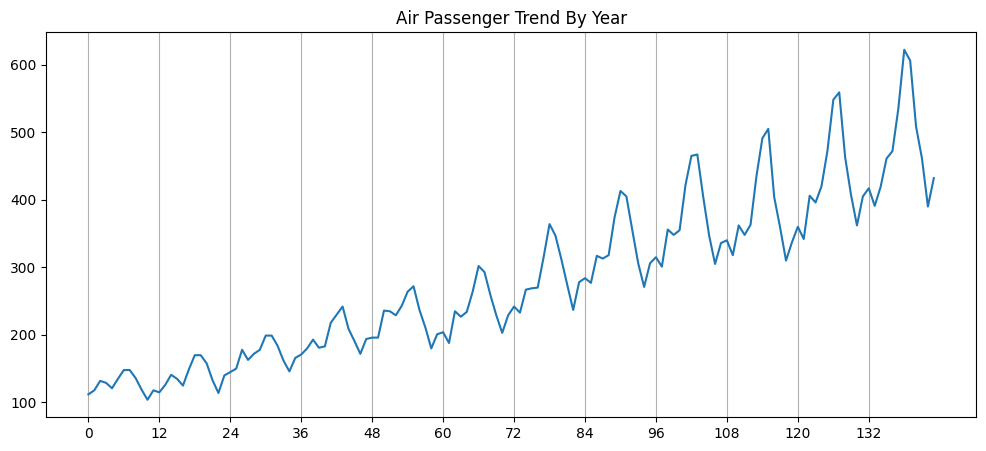

In [4]:
plt.figure(figsize=(12,5))
plt.title('Air Passenger Trend By Year')
plt.xticks(range(0,144,12))
plt.grid(axis='x')     # On X-axis years are ploted , 12 years data 
plt.plot(air)
plt.show()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
date=pd.date_range(start='2001-01-01', end='2013-01-01',freq='m')

In [7]:
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [8]:
df=pd.DataFrame({'Date':date,'Air':air})

In [9]:
df.head()

,Date,Air
0,2001-01-31,112
1,2001-02-28,118
2,2001-03-31,132
3,2001-04-30,129
4,2001-05-31,121


In [10]:
df.index=date

In [11]:
df.drop(columns='Date', inplace=True)

In [12]:
df.head()

,Air
2001-01-31,112
2001-02-28,118
2001-03-31,132
2001-04-30,129
2001-05-31,121


In [13]:
plot=seasonal_decompose(df)

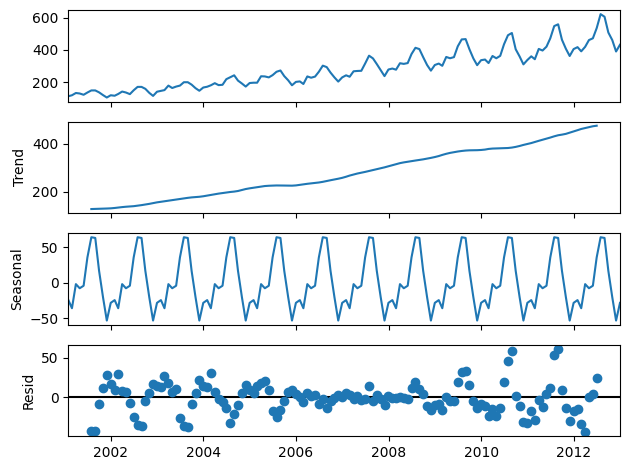

In [14]:
plot.plot();

In [15]:
best_order=(2,1,3)  #(P,D,Q) 
#P=Auto regression on basis of last 2 points, (Predicted for Next)
#D=diffrence of Error till 1 point , (Diffrence in next and current one)
#Q=Moving Average(How much last months to be consider, here it's 3)(Avg. for previous, current and next)

In [16]:
model=ARIMA(air,order=best_order)

In [17]:
result=model.fit()

In [18]:
months=12

In [19]:
forecast=result.get_forecast(steps=months)

In [20]:
forecast.predicted_mean

144    482.350268
145    468.454382
146    473.694192
147    467.044390
148    470.035564
149    466.803282
150    468.452466
151    466.861137
152    467.750671
153    466.959192
154    467.432069
155    467.035260
Name: predicted_mean, dtype: float64

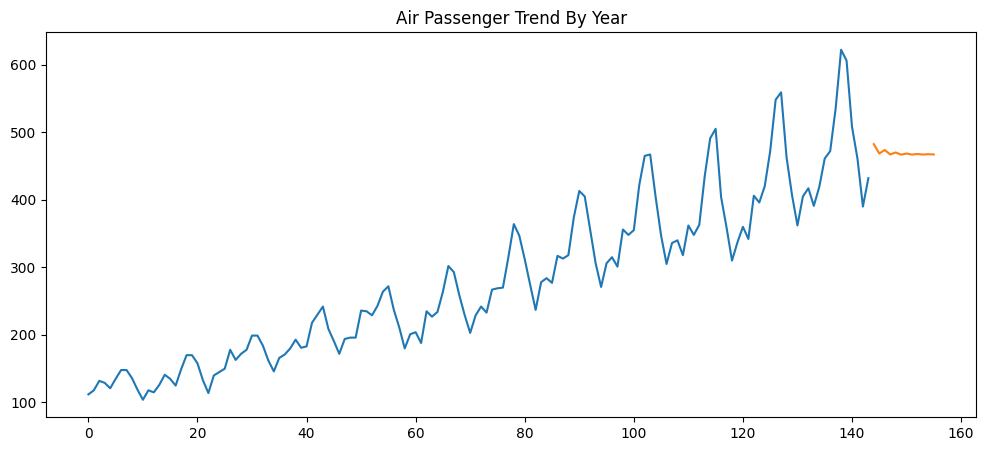

In [21]:
plt.figure(figsize=(12,5))
plt.title('Air Passenger Trend By Year')
plt.plot(air)
plt.plot(np.arange(144,156), forecast.predicted_mean)
plt.show()

In [22]:
result.aic

1385.550529945573

In [23]:
best_order= None
best_aic=np.inf

In [24]:
for p in range (5,15):
    for d in range (2,6):
        for q in range(8,15):
            try:
                m=ARIMA(air, order=(p,d,q))
                result=m.fit()
                if result.aic<best_aic:
                   best_aic=result.aic
                   best_order=(p,d,q)
            except:
                print('Exception occure')
                continue

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

Exception occure


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [25]:
best_aic

40.0

In [26]:
best_order

(5, 5, 14)

In [27]:
model=ARIMA(air, order=(11,2,8)) # Here for order we have to put best_order as it will be ca;lculated by system, but it is not showing proper graph, so we put manual values by trial and error it gives good plot.

In [28]:
result=model.fit()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
forecast=result.get_forecast(steps=months)

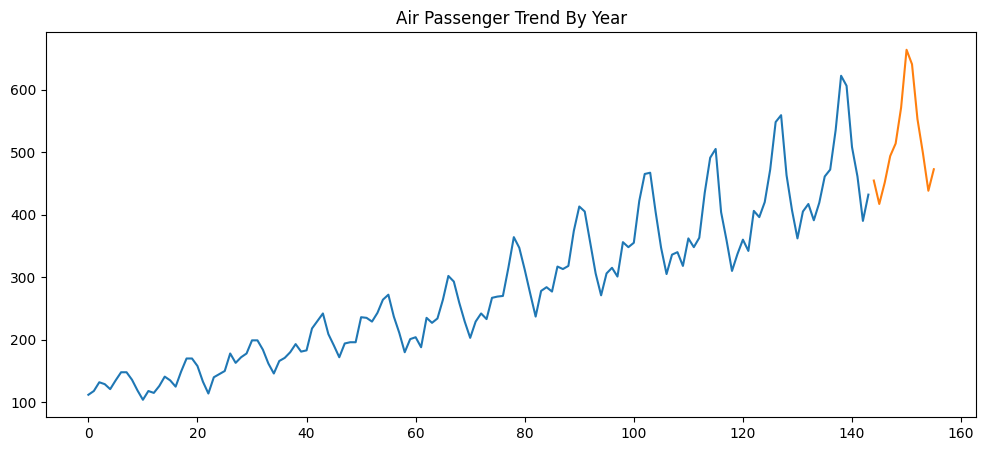

In [30]:
plt.figure(figsize=(12,5))
plt.title('Air Passenger Trend By Year')
plt.plot(air)
plt.plot(np.arange(144,156), forecast.predicted_mean)
plt.show()

In [31]:
forecast.predicted_mean

144    454.487560
145    417.025432
146    451.246417
147    493.620195
148    513.687877
149    570.999226
150    663.554943
151    640.464340
152    552.737698
153    498.412673
154    438.165422
155    472.572401
Name: predicted_mean, dtype: float64